In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv(r'train.csv')
test = pd.read_csv(r'test.csv')

In [5]:
def clean_data(titanic):#填充空数据 和 把string数据转成integer表示
    titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
    # child
    titanic["child"] = titanic["Age"].apply(lambda x: 1 if x < 15 else 0)

    # sex
    titanic["sex"] = titanic["Sex"].apply(lambda x: 1 if x == "male" else 0)

    titanic["Embarked"] = titanic["Embarked"].fillna("S")
    # embark
    def getEmbark(Embarked):
        if Embarked == "S":
            return 1
        elif Embarked == "C":
            return 2
        else:
            return 3
    titanic["embark"] = titanic["Embarked"].apply(getEmbark)

    # familysize
    titanic["fimalysize"] = titanic["SibSp"] + titanic["Parch"] + 1

    # cabin
    def getCabin(cabin):
        if cabin == "N":
            return 0
        else:
            return 1
    titanic["cabin"] = titanic["Cabin"].apply(getCabin)

    # name
    def getName(name):
        if "Mr" in str(name):
            return 1
        elif "Mrs" in str(name):
            return 2
        else:
            return 0
    titanic["name"] = titanic["Name"].apply(getName)

    titanic["Fare"] = titanic["Fare"].fillna(titanic["Fare"].median())

    return titanic
# 对数据进行清洗
train_data = clean_data(train)
test_data = clean_data(test)

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.metrics import accuracy_score

C:\Users\Zishi\Anaconda3\lib\json\encoder.py:199: DeprecationWarning: Interpreting naive datetime as local 2017-08-23 21:54:01.447495. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [7]:
features = ["Pclass", "sex", "child", "fimalysize", "Fare", "embark", "cabin"]
clf =XGBClassifier(learning_rate=0.1, max_depth=2, 
silent=True, objective='binary:logistic')

param_test = {
    'n_estimators': range(30, 50, 2),
    'max_depth': range(2, 7, 1)
}
grid_search = GridSearchCV(estimator = clf, param_grid = param_test, 
scoring='accuracy', cv=5)
grid_search.fit(train[features], train["Survived"])
grid_search.grid_scores_, grid_search.best_params_, grid_search.best_score_

C:\Users\Zishi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.81594, std: 0.00673, params: {'max_depth': 2, 'n_estimators': 30},
  mean: 0.81930, std: 0.00916, params: {'max_depth': 2, 'n_estimators': 32},
  mean: 0.82267, std: 0.00978, params: {'max_depth': 2, 'n_estimators': 34},
  mean: 0.82043, std: 0.01423, params: {'max_depth': 2, 'n_estimators': 36},
  mean: 0.82267, std: 0.01585, params: {'max_depth': 2, 'n_estimators': 38},
  mean: 0.82604, std: 0.01800, params: {'max_depth': 2, 'n_estimators': 40},
  mean: 0.82604, std: 0.01800, params: {'max_depth': 2, 'n_estimators': 42},
  mean: 0.82379, std: 0.01629, params: {'max_depth': 2, 'n_estimators': 44},
  mean: 0.82379, std: 0.01629, params: {'max_depth': 2, 'n_estimators': 46},
  mean: 0.82267, std: 0.01545, params: {'max_depth': 2, 'n_estimators': 48},
  mean: 0.82043, std: 0.01642, params: {'max_depth': 3, 'n_estimators': 30},
  mean: 0.81930, std: 0.01690, params: {'max_depth': 3, 'n_estimators': 32},
  mean: 0.81818, std: 0.01863, params: {'max_depth': 3, 'n_estimators': 34},

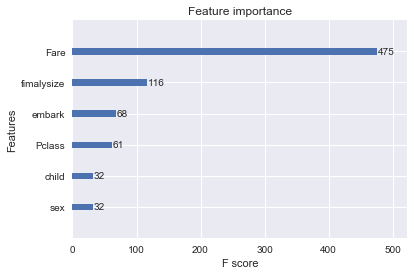

In [8]:
from xgboost import plot_importance
bst = XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators = 32,
silent=True, objective='binary:logistic')
bst.fit(train[features],train["Survived"])

plot_importance(bst)
plt.show()

In [11]:
pred = bst.predict(test[features])

submission = pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived':pred
})
submission.to_csv('titanicbst.csv',index=False)